In [1]:
# Imports
from pathlib import Path

import numpy as np
import xarray as xr
import regionmask
from matplotlib import pyplot as plt

import echoregions as er

In [2]:
# Show regionmask version
regionmask.__version__

'0.10.0'

In [3]:
# Set directories
DATA_DIR = Path("./echoregions/test_data/")
EVR_PATH = DATA_DIR / "transect.evr"
ZARR_PATH = DATA_DIR / "transect.zarr"

# Read in EVR and Sv data
r2d = er.read_evr(EVR_PATH)
da_Sv = xr.open_zarr(ZARR_PATH).Sv

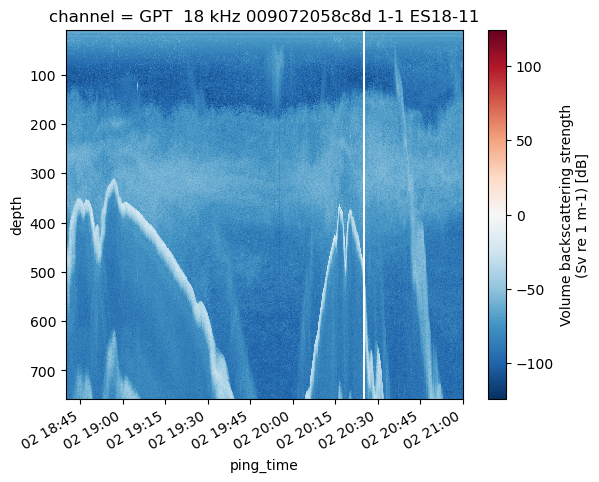

In [4]:
# Plot da_Sv
da_Sv.isel(channel=0).plot(yincrease=False)

In [5]:
# Show start and end times of da_Sv
earliest_time_da_Sv = da_Sv.ping_time[0].values
latest_time_da_Sv = da_Sv.ping_time[-1].values
print(f"Earliest Time {earliest_time_da_Sv}")
print(f"Latest Time {latest_time_da_Sv}")

Earliest Time 2019-07-02T18:40:00.000000000
Latest Time 2019-07-02T21:00:00.000000000


In [6]:
# Extract Region IDs and convert to Python float values
region_ids = r2d.data.region_id.astype(float).to_list()

for region_id in region_ids:
    print(f"Region ID : {int(region_id)}")
    left_time = r2d.select_region(region_id)["region_bbox_left"].values
    right_time = r2d.select_region(region_id)["region_bbox_right"].values
    print(f"Region BBox Left Time {left_time}")
    print(f"Region BBox Right Time {right_time}")
    depth_values = r2d.select_region(region_id)["depth"].values[0]
    print(f"Depth Values {depth_values}")
    print("-------------------------------------------------")

# As can be seen below, the only region that "should" overlap with the Sv data above is 18.
# All regions in between are in the specified time zone, but depth values are "NaN".

Region ID : 1
Region BBox Left Time ['2019-07-02T03:50:54.629500000']
Region BBox Right Time ['2019-07-02T08:10:09.425500000']
Depth Values [-9999.99  9999.99  9999.99 -9999.99]
-------------------------------------------------
Region ID : 2
Region BBox Left Time ['2019-07-02T12:32:30.175500000']
Region BBox Right Time ['2019-07-02T12:32:31.740500000']
Depth Values [-9999.99  9999.99  9999.99 -9999.99]
-------------------------------------------------
Region ID : 3
Region BBox Left Time ['2019-07-02T12:43:06.273000000']
Region BBox Right Time ['2019-07-02T12:43:10.758500000']
Depth Values [-9999.99  9999.99  9999.99 -9999.99]
-------------------------------------------------
Region ID : 4
Region BBox Left Time ['2019-07-02T12:54:59.931500000']
Region BBox Right Time ['2019-07-02T12:55:01.303000000']
Depth Values [-9999.99  9999.99  9999.99 -9999.99]
-------------------------------------------------
Region ID : 5
Region BBox Left Time ['2019-07-02T13:14:00.488000000']
Region BBox Right 

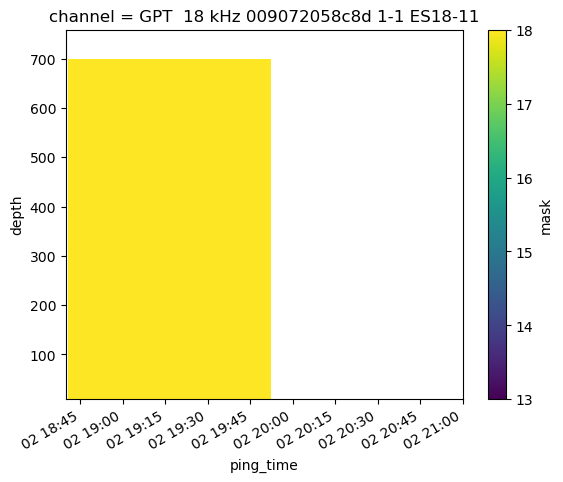

In [7]:
# Select channel 0
da_Sv_chan_0 = da_Sv.isel(channel=0)

# Error for overlapping regions when trying to perform 2D mask operation
M = r2d.mask(da_Sv_chan_0, region_ids, mask_labels=region_ids)

M.plot()
plt.show()

Region ID 1.0
<xarray.DataArray 'mask' (depth: 3955, ping_time: 1681)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    channel       <U37 'GPT  18 kHz 009072058c8d 1-1 ES18-11'
  * depth         (depth) float64 9.15 9.34 9.529 9.719 ... 758.1 758.3 758.5
    range_sample  (depth) int64 0 3 4 5 6 7 8 ... 3951 3952 3953 3954 3955 3956
  * ping_time     (ping_time) datetime64[ns] 2019-07-02T18:40:00 ... 2019-07-...
    unix_time     (ping_time) float64 1.808e+04 1.808e+04 ... 1.808e+04


/home/ec2-user/mambaforge/envs/er_region_mask/lib/python3.9/site-packages/regionmask/core/_deprecate.py:108: UserWarning: No gridpoint belongs to any region. Returning an all-NaN mask.
  return func(*args, **kwargs)


Unique Values [nan]


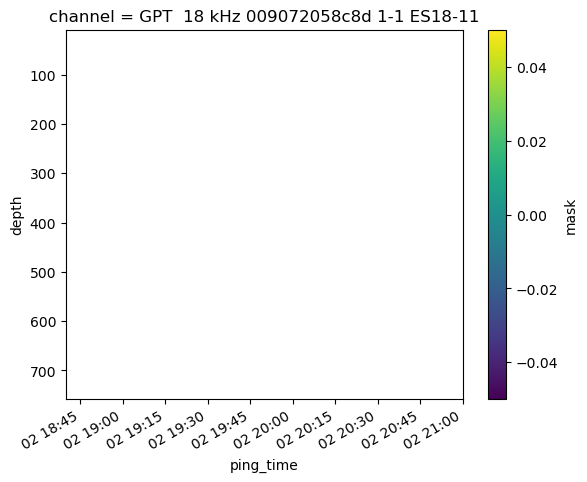

Region ID 2.0
<xarray.DataArray 'mask' (depth: 3955, ping_time: 1681)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    channel       <U37 'GPT  18 kHz 009072058c8d 1-1 ES18-11'
  * depth         (depth) float64 9.15 9.34 9.529 9.719 ... 758.1 758.3 758.5
    range_sample  (depth) int64 0 3 4 5 6 7 8 ... 3951 3952 3953 3954 3955 3956
  * ping_time     (ping_time) datetime64[ns] 2019-07-02T18:40:00 ... 2019-07-...
    unix_time     (ping_time) float64 1.808e+04 1.808e+04 ... 1.808e+04


/home/ec2-user/mambaforge/envs/er_region_mask/lib/python3.9/site-packages/regionmask/core/_deprecate.py:108: UserWarning: No gridpoint belongs to any region. Returning an all-NaN mask.
  return func(*args, **kwargs)


Unique Values [nan]


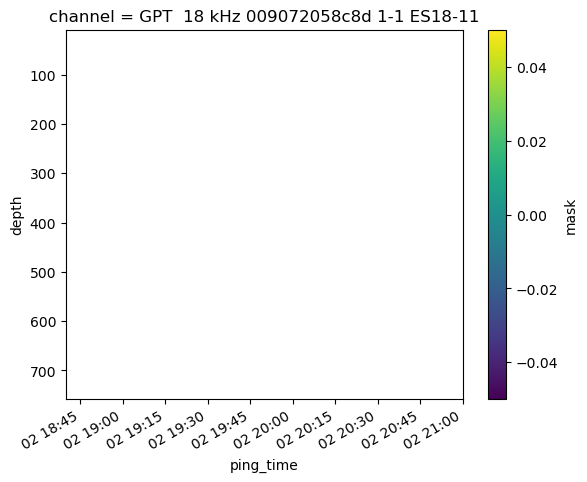

Region ID 3.0
<xarray.DataArray 'mask' (depth: 3955, ping_time: 1681)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    channel       <U37 'GPT  18 kHz 009072058c8d 1-1 ES18-11'
  * depth         (depth) float64 9.15 9.34 9.529 9.719 ... 758.1 758.3 758.5
    range_sample  (depth) int64 0 3 4 5 6 7 8 ... 3951 3952 3953 3954 3955 3956
  * ping_time     (ping_time) datetime64[ns] 2019-07-02T18:40:00 ... 2019-07-...
    unix_time     (ping_time) float64 1.808e+04 1.808e+04 ... 1.808e+04
Unique Values [nan]


/home/ec2-user/mambaforge/envs/er_region_mask/lib/python3.9/site-packages/regionmask/core/_deprecate.py:108: UserWarning: No gridpoint belongs to any region. Returning an all-NaN mask.
  return func(*args, **kwargs)


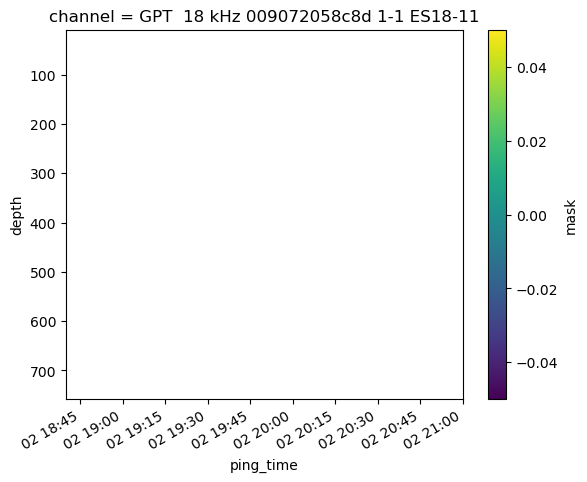

Region ID 4.0
<xarray.DataArray 'mask' (depth: 3955, ping_time: 1681)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    channel       <U37 'GPT  18 kHz 009072058c8d 1-1 ES18-11'
  * depth         (depth) float64 9.15 9.34 9.529 9.719 ... 758.1 758.3 758.5
    range_sample  (depth) int64 0 3 4 5 6 7 8 ... 3951 3952 3953 3954 3955 3956
  * ping_time     (ping_time) datetime64[ns] 2019-07-02T18:40:00 ... 2019-07-...
    unix_time     (ping_time) float64 1.808e+04 1.808e+04 ... 1.808e+04
Unique Values [nan]


/home/ec2-user/mambaforge/envs/er_region_mask/lib/python3.9/site-packages/regionmask/core/_deprecate.py:108: UserWarning: No gridpoint belongs to any region. Returning an all-NaN mask.
  return func(*args, **kwargs)


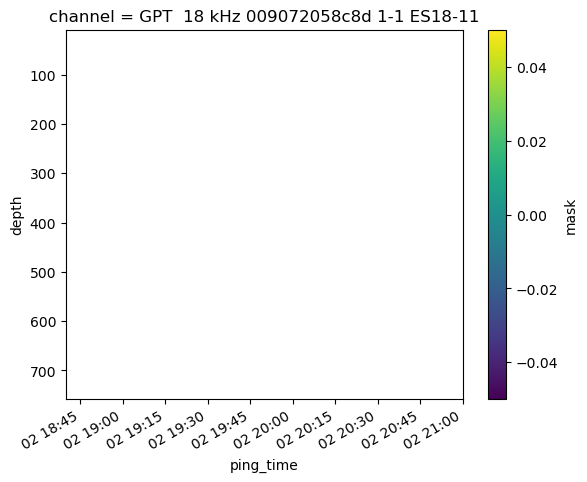

Region ID 5.0
<xarray.DataArray 'mask' (depth: 3955, ping_time: 1681)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    channel       <U37 'GPT  18 kHz 009072058c8d 1-1 ES18-11'
  * depth         (depth) float64 9.15 9.34 9.529 9.719 ... 758.1 758.3 758.5
    range_sample  (depth) int64 0 3 4 5 6 7 8 ... 3951 3952 3953 3954 3955 3956
  * ping_time     (ping_time) datetime64[ns] 2019-07-02T18:40:00 ... 2019-07-...
    unix_time     (ping_time) float64 1.808e+04 1.808e+04 ... 1.808e+04


/home/ec2-user/mambaforge/envs/er_region_mask/lib/python3.9/site-packages/regionmask/core/_deprecate.py:108: UserWarning: No gridpoint belongs to any region. Returning an all-NaN mask.
  return func(*args, **kwargs)


Unique Values [nan]


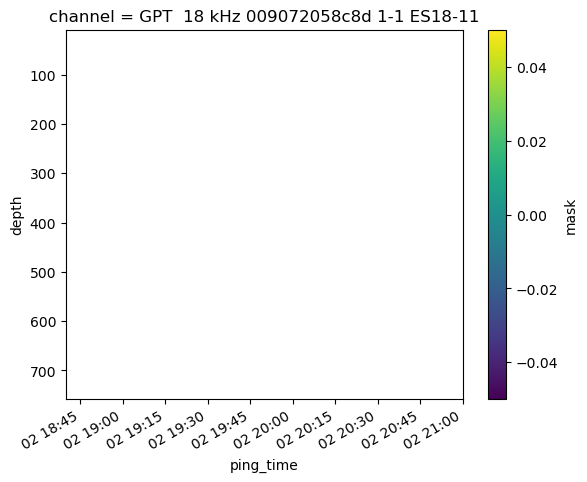

Region ID 6.0
<xarray.DataArray 'mask' (depth: 3955, ping_time: 1681)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    channel       <U37 'GPT  18 kHz 009072058c8d 1-1 ES18-11'
  * depth         (depth) float64 9.15 9.34 9.529 9.719 ... 758.1 758.3 758.5
    range_sample  (depth) int64 0 3 4 5 6 7 8 ... 3951 3952 3953 3954 3955 3956
  * ping_time     (ping_time) datetime64[ns] 2019-07-02T18:40:00 ... 2019-07-...
    unix_time     (ping_time) float64 1.808e+04 1.808e+04 ... 1.808e+04
Unique Values [nan]


/home/ec2-user/mambaforge/envs/er_region_mask/lib/python3.9/site-packages/regionmask/core/_deprecate.py:108: UserWarning: No gridpoint belongs to any region. Returning an all-NaN mask.
  return func(*args, **kwargs)


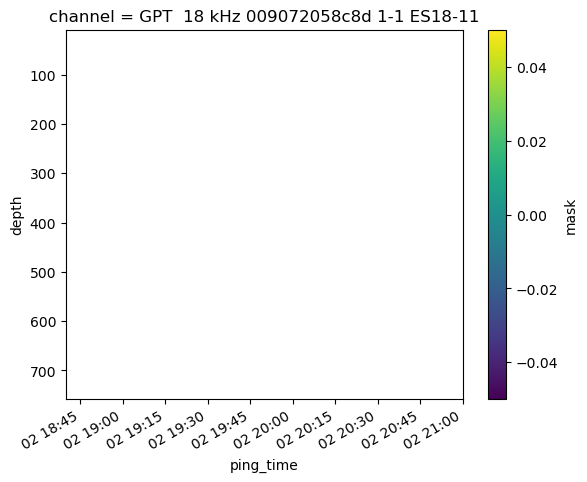

Region ID 7.0
<xarray.DataArray 'mask' (depth: 3955, ping_time: 1681)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    channel       <U37 'GPT  18 kHz 009072058c8d 1-1 ES18-11'
  * depth         (depth) float64 9.15 9.34 9.529 9.719 ... 758.1 758.3 758.5
    range_sample  (depth) int64 0 3 4 5 6 7 8 ... 3951 3952 3953 3954 3955 3956
  * ping_time     (ping_time) datetime64[ns] 2019-07-02T18:40:00 ... 2019-07-...
    unix_time     (ping_time) float64 1.808e+04 1.808e+04 ... 1.808e+04


/home/ec2-user/mambaforge/envs/er_region_mask/lib/python3.9/site-packages/regionmask/core/_deprecate.py:108: UserWarning: No gridpoint belongs to any region. Returning an all-NaN mask.
  return func(*args, **kwargs)


Unique Values [nan]


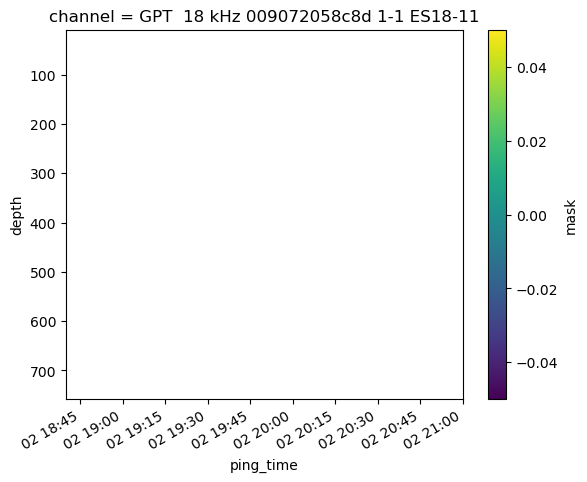

Region ID 8.0
<xarray.DataArray 'mask' (depth: 3955, ping_time: 1681)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    channel       <U37 'GPT  18 kHz 009072058c8d 1-1 ES18-11'
  * depth         (depth) float64 9.15 9.34 9.529 9.719 ... 758.1 758.3 758.5
    range_sample  (depth) int64 0 3 4 5 6 7 8 ... 3951 3952 3953 3954 3955 3956
  * ping_time     (ping_time) datetime64[ns] 2019-07-02T18:40:00 ... 2019-07-...
    unix_time     (ping_time) float64 1.808e+04 1.808e+04 ... 1.808e+04
Unique Values [nan]


/home/ec2-user/mambaforge/envs/er_region_mask/lib/python3.9/site-packages/regionmask/core/_deprecate.py:108: UserWarning: No gridpoint belongs to any region. Returning an all-NaN mask.
  return func(*args, **kwargs)


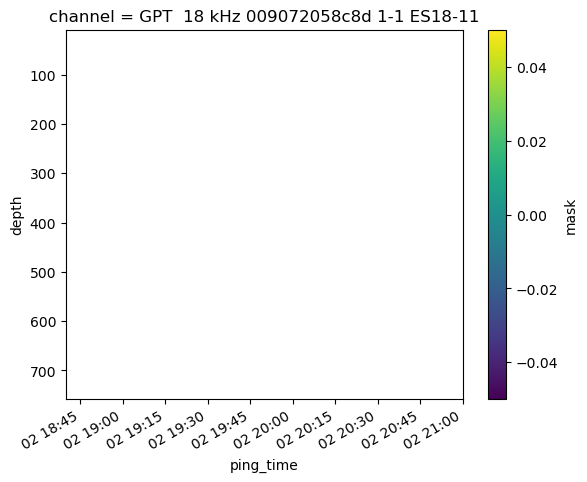

Region ID 9.0
<xarray.DataArray 'mask' (depth: 3955, ping_time: 1681)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    channel       <U37 'GPT  18 kHz 009072058c8d 1-1 ES18-11'
  * depth         (depth) float64 9.15 9.34 9.529 9.719 ... 758.1 758.3 758.5
    range_sample  (depth) int64 0 3 4 5 6 7 8 ... 3951 3952 3953 3954 3955 3956
  * ping_time     (ping_time) datetime64[ns] 2019-07-02T18:40:00 ... 2019-07-...
    unix_time     (ping_time) float64 1.808e+04 1.808e+04 ... 1.808e+04
Unique Values [nan]


/home/ec2-user/mambaforge/envs/er_region_mask/lib/python3.9/site-packages/regionmask/core/_deprecate.py:108: UserWarning: No gridpoint belongs to any region. Returning an all-NaN mask.
  return func(*args, **kwargs)


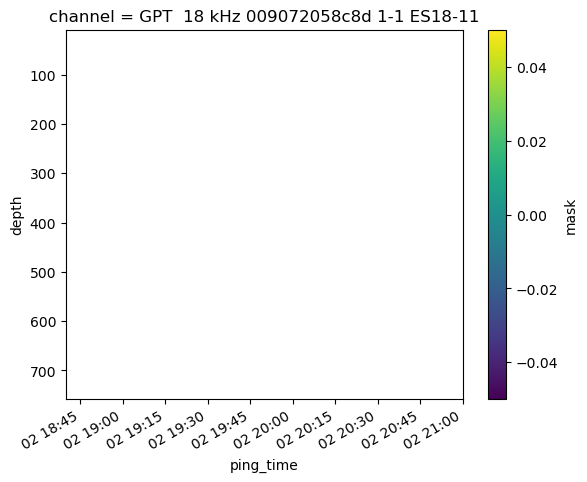

Region ID 10.0
<xarray.DataArray 'mask' (depth: 3955, ping_time: 1681)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    channel       <U37 'GPT  18 kHz 009072058c8d 1-1 ES18-11'
  * depth         (depth) float64 9.15 9.34 9.529 9.719 ... 758.1 758.3 758.5
    range_sample  (depth) int64 0 3 4 5 6 7 8 ... 3951 3952 3953 3954 3955 3956
  * ping_time     (ping_time) datetime64[ns] 2019-07-02T18:40:00 ... 2019-07-...
    unix_time     (ping_time) float64 1.808e+04 1.808e+04 ... 1.808e+04


/home/ec2-user/mambaforge/envs/er_region_mask/lib/python3.9/site-packages/regionmask/core/_deprecate.py:108: UserWarning: No gridpoint belongs to any region. Returning an all-NaN mask.
  return func(*args, **kwargs)


Unique Values [nan]


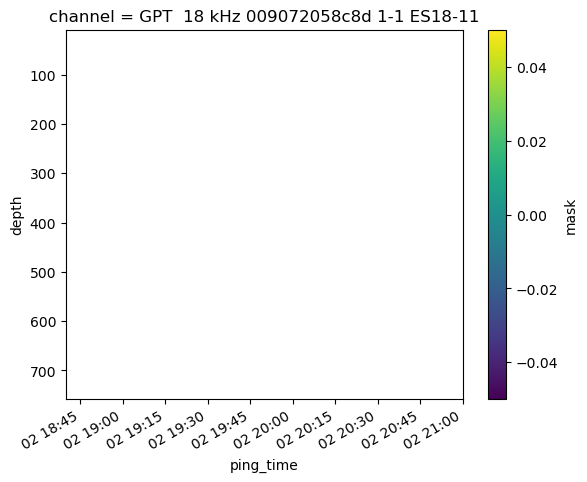

Region ID 11.0
<xarray.DataArray 'mask' (depth: 3955, ping_time: 1681)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    channel       <U37 'GPT  18 kHz 009072058c8d 1-1 ES18-11'
  * depth         (depth) float64 9.15 9.34 9.529 9.719 ... 758.1 758.3 758.5
    range_sample  (depth) int64 0 3 4 5 6 7 8 ... 3951 3952 3953 3954 3955 3956
  * ping_time     (ping_time) datetime64[ns] 2019-07-02T18:40:00 ... 2019-07-...
    unix_time     (ping_time) float64 1.808e+04 1.808e+04 ... 1.808e+04


/home/ec2-user/mambaforge/envs/er_region_mask/lib/python3.9/site-packages/regionmask/core/_deprecate.py:108: UserWarning: No gridpoint belongs to any region. Returning an all-NaN mask.
  return func(*args, **kwargs)


Unique Values [nan]


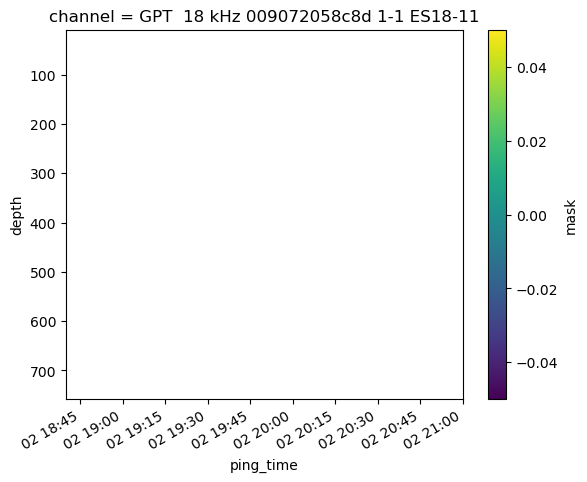

Region ID 12.0
<xarray.DataArray 'mask' (depth: 3955, ping_time: 1681)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    channel       <U37 'GPT  18 kHz 009072058c8d 1-1 ES18-11'
  * depth         (depth) float64 9.15 9.34 9.529 9.719 ... 758.1 758.3 758.5
    range_sample  (depth) int64 0 3 4 5 6 7 8 ... 3951 3952 3953 3954 3955 3956
  * ping_time     (ping_time) datetime64[ns] 2019-07-02T18:40:00 ... 2019-07-...
    unix_time     (ping_time) float64 1.808e+04 1.808e+04 ... 1.808e+04
Unique Values [nan]


/home/ec2-user/mambaforge/envs/er_region_mask/lib/python3.9/site-packages/regionmask/core/_deprecate.py:108: UserWarning: No gridpoint belongs to any region. Returning an all-NaN mask.
  return func(*args, **kwargs)


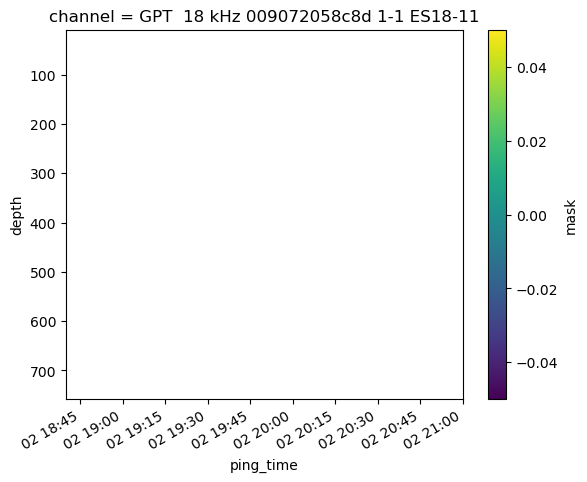

Region ID 13.0
<xarray.DataArray 'mask' (depth: 3955, ping_time: 1681)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    channel       <U37 'GPT  18 kHz 009072058c8d 1-1 ES18-11'
  * depth         (depth) float64 9.15 9.34 9.529 9.719 ... 758.1 758.3 758.5
    range_sample  (depth) int64 0 3 4 5 6 7 8 ... 3951 3952 3953 3954 3955 3956
  * ping_time     (ping_time) datetime64[ns] 2019-07-02T18:40:00 ... 2019-07-...
    unix_time     (ping_time) float64 1.808e+04 1.808e+04 ... 1.808e+04
Unique Values [13. nan]


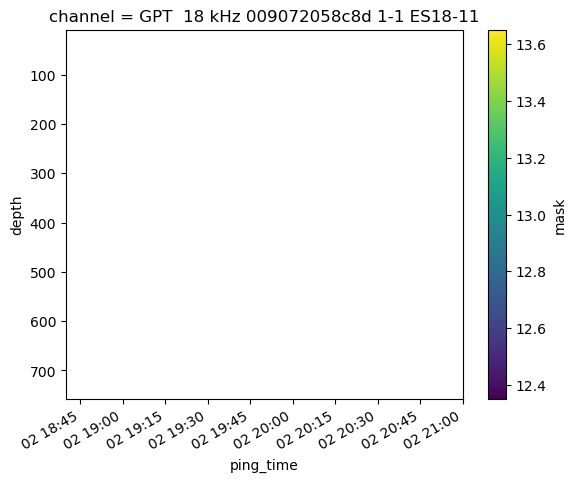

Region ID 14.0
<xarray.DataArray 'mask' (depth: 3955, ping_time: 1681)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    channel       <U37 'GPT  18 kHz 009072058c8d 1-1 ES18-11'
  * depth         (depth) float64 9.15 9.34 9.529 9.719 ... 758.1 758.3 758.5
    range_sample  (depth) int64 0 3 4 5 6 7 8 ... 3951 3952 3953 3954 3955 3956
  * ping_time     (ping_time) datetime64[ns] 2019-07-02T18:40:00 ... 2019-07-...
    unix_time     (ping_time) float64 1.808e+04 1.808e+04 ... 1.808e+04
Unique Values [nan]


/home/ec2-user/mambaforge/envs/er_region_mask/lib/python3.9/site-packages/regionmask/core/_deprecate.py:108: UserWarning: No gridpoint belongs to any region. Returning an all-NaN mask.
  return func(*args, **kwargs)


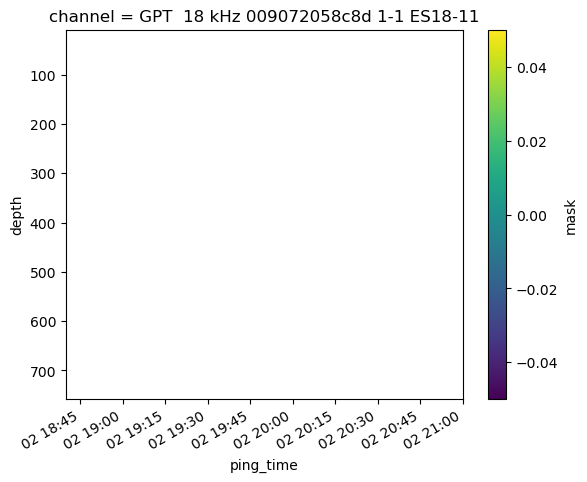

Region ID 15.0
<xarray.DataArray 'mask' (depth: 3955, ping_time: 1681)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    channel       <U37 'GPT  18 kHz 009072058c8d 1-1 ES18-11'
  * depth         (depth) float64 9.15 9.34 9.529 9.719 ... 758.1 758.3 758.5
    range_sample  (depth) int64 0 3 4 5 6 7 8 ... 3951 3952 3953 3954 3955 3956
  * ping_time     (ping_time) datetime64[ns] 2019-07-02T18:40:00 ... 2019-07-...
    unix_time     (ping_time) float64 1.808e+04 1.808e+04 ... 1.808e+04
Unique Values [nan]


/home/ec2-user/mambaforge/envs/er_region_mask/lib/python3.9/site-packages/regionmask/core/_deprecate.py:108: UserWarning: No gridpoint belongs to any region. Returning an all-NaN mask.
  return func(*args, **kwargs)


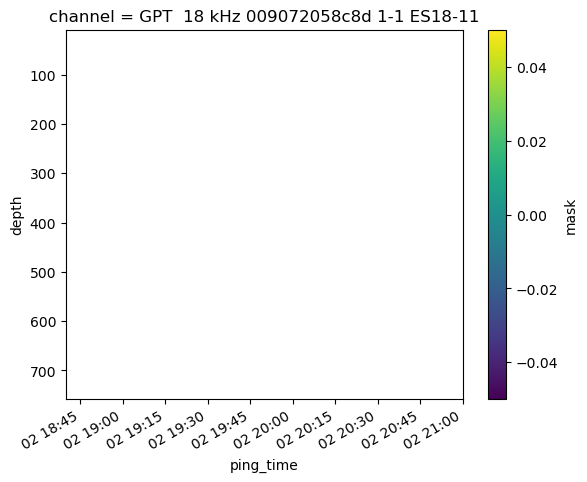

Region ID 16.0
<xarray.DataArray 'mask' (depth: 3955, ping_time: 1681)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    channel       <U37 'GPT  18 kHz 009072058c8d 1-1 ES18-11'
  * depth         (depth) float64 9.15 9.34 9.529 9.719 ... 758.1 758.3 758.5
    range_sample  (depth) int64 0 3 4 5 6 7 8 ... 3951 3952 3953 3954 3955 3956
  * ping_time     (ping_time) datetime64[ns] 2019-07-02T18:40:00 ... 2019-07-...
    unix_time     (ping_time) float64 1.808e+04 1.808e+04 ... 1.808e+04
Unique Values [nan]


/home/ec2-user/mambaforge/envs/er_region_mask/lib/python3.9/site-packages/regionmask/core/_deprecate.py:108: UserWarning: No gridpoint belongs to any region. Returning an all-NaN mask.
  return func(*args, **kwargs)


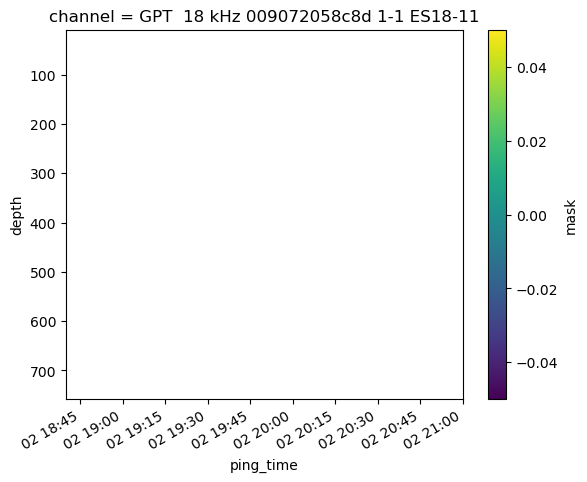

Region ID 17.0
<xarray.DataArray 'mask' (depth: 3955, ping_time: 1681)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    channel       <U37 'GPT  18 kHz 009072058c8d 1-1 ES18-11'
  * depth         (depth) float64 9.15 9.34 9.529 9.719 ... 758.1 758.3 758.5
    range_sample  (depth) int64 0 3 4 5 6 7 8 ... 3951 3952 3953 3954 3955 3956
  * ping_time     (ping_time) datetime64[ns] 2019-07-02T18:40:00 ... 2019-07-...
    unix_time     (ping_time) float64 1.808e+04 1.808e+04 ... 1.808e+04
Unique Values [nan]


/home/ec2-user/mambaforge/envs/er_region_mask/lib/python3.9/site-packages/regionmask/core/_deprecate.py:108: UserWarning: No gridpoint belongs to any region. Returning an all-NaN mask.
  return func(*args, **kwargs)


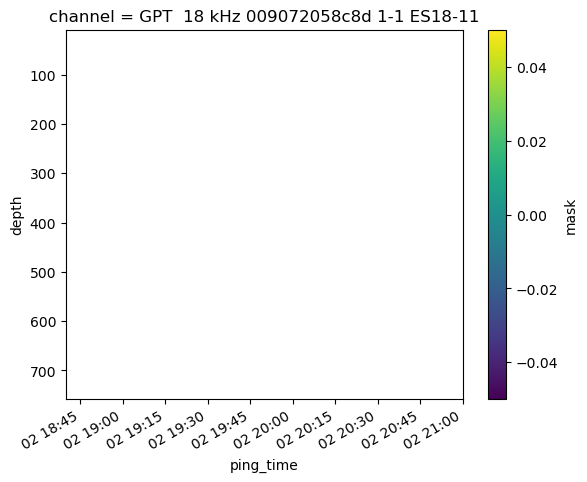

Region ID 18.0
<xarray.DataArray 'mask' (depth: 3955, ping_time: 1681)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    channel       <U37 'GPT  18 kHz 009072058c8d 1-1 ES18-11'
  * depth         (depth) float64 9.15 9.34 9.529 9.719 ... 758.1 758.3 758.5
    range_sample  (depth) int64 0 3 4 5 6 7 8 ... 3951 3952 3953 3954 3955 3956
  * ping_time     (ping_time) datetime64[ns] 2019-07-02T18:40:00 ... 2019-07-...
    unix_time     (ping_time) float64 1.808e+04 1.808e+04 ... 1.808e+04
Unique Values [18. nan]


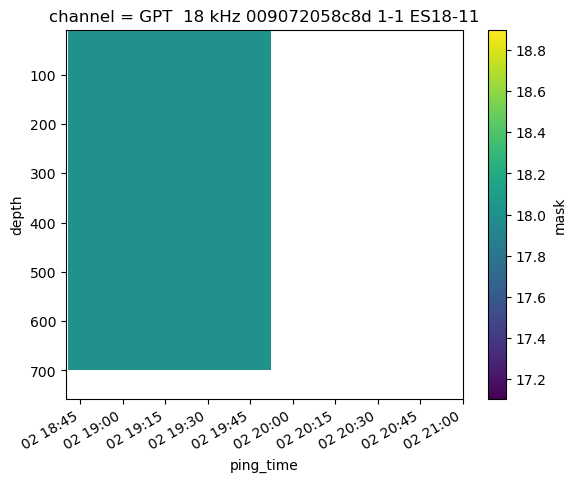

Region ID 19.0
<xarray.DataArray 'mask' (depth: 3955, ping_time: 1681)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    channel       <U37 'GPT  18 kHz 009072058c8d 1-1 ES18-11'
  * depth         (depth) float64 9.15 9.34 9.529 9.719 ... 758.1 758.3 758.5
    range_sample  (depth) int64 0 3 4 5 6 7 8 ... 3951 3952 3953 3954 3955 3956
  * ping_time     (ping_time) datetime64[ns] 2019-07-02T18:40:00 ... 2019-07-...
    unix_time     (ping_time) float64 1.808e+04 1.808e+04 ... 1.808e+04


/home/ec2-user/mambaforge/envs/er_region_mask/lib/python3.9/site-packages/regionmask/core/_deprecate.py:108: UserWarning: No gridpoint belongs to any region. Returning an all-NaN mask.
  return func(*args, **kwargs)


Unique Values [nan]


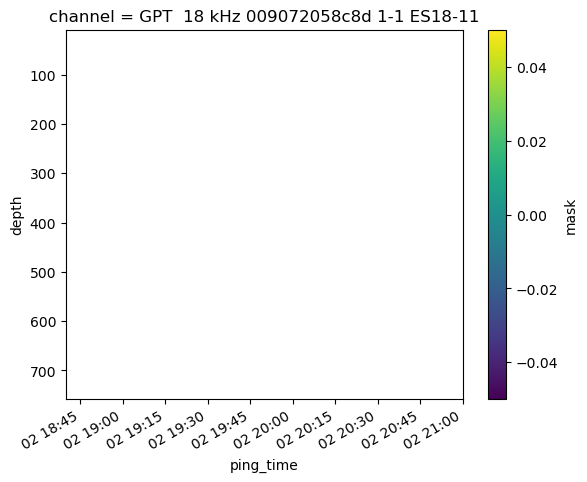

In [8]:
for region_id in region_ids:
    print(f"Region ID {region_id}")

    # Create 2D mask for single region_id
    M = r2d.mask(da_Sv_chan_0, region_ids=[region_id], mask_labels=[region_id])
    print(M)
    
    # Print Unique Values
    print(f"Unique Values {np.unique(M.data)}")

    M.plot(yincrease=False)
    plt.show()